In [1]:
import pathlib 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold
from tensorflow.keras.utils import plot_model
import eli5
from eli5.sklearn import PermutationImportance

C:\Users\janpo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\janpo\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def grad(x2,x1,y2,y1):
    g=(y2-y1)/(x2-x1)
    return g

In [3]:
train_log =pd.read_csv('best.csv',skipinitialspace=True)
train_log

# get dataset from csv file 
path='Plot\\'
if os.path.exists(path)==False:
    os.mkdir(path)

In [4]:
train_log

,Network,Train_R2,Train_R2 std,Train_RSME,Train_RSME std,Train_MAE,Train_MAE std,Test_R2,Test_R2 std,Test_RSME,Test_RSME std,Test_MAE,Test_MAE std,Epoch,Learning Rate,asd,asdasdas
0,Trial-34(7 x 10 x 10 x 1),0.991829,0.004822,0.020714,0.004851,0.014253,0.002356,0.971247,0.022400,0.036508,0.015856,0.026164,0.009503,668,0.0075,0,1
1,Trial-13(7 x 12 x 12 x 1),0.985593,0.002348,0.025145,0.001918,0.016279,0.001747,0.965939,0.008123,0.041833,0.009336,0.028918,0.006664,314,0.0050,0,2
2,Trial-37(7 x 16 x 16 x 1),0.987065,0.005648,0.025574,0.006972,0.018406,0.007008,0.966110,0.026382,0.040258,0.018364,0.028562,0.012945,408,0.0075,0,3
3,Trial-50(7 x 20 x 20 x 1),0.993338,0.006840,0.016670,0.006386,0.011442,0.004439,0.966694,0.033021,0.040289,0.020436,0.024794,0.009769,610,0.0025,0,4
4,Trial-19(7 x 24 x 24 x 1),0.992251,0.004639,0.019956,0.006002,0.014257,0.003363,0.967896,0.010844,0.042031,0.011744,0.027628,0.007962,416,0.0050,0,5
5,Trial-30(7 x 24 x 24 x 1),0.987879,0.012073,0.022411,0.010895,0.015797,0.008340,0.973463,0.012760,0.035243,0.010510,0.023753,0.005868,362,0.0100,0,6
6,Trial-9(7 x 26 x 26 x 1),0.987081,0.006124,0.023559,0.006572,0.015510,0.005348,0.969310,0.008911,0.039543,0.008843,0.026808,0.006531,382,0.0010,0,7
7,Trial-43(7 x 28 x 28 x 1),0.992497,0.005278,0.020128,0.007513,0.012842,0.004621,0.979533,0.009949,0.036399,0.006591,0.023109,0.006074,345,0.0075,0,8
8,Trial-21(7 x 28 x 28 x 1),0.991863,0.004028,0.020795,0.003886,0.013763,0.002297,0.968104,0.020578,0.040670,0.012641,0.027152,0.007364,383,0.0050,0,9
9,Trial-44(7 x 30 x 30 x 1),0.996791,0.001585,0.012556,0.003363,0.008570,0.002588,0.971937,0.023651,0.035091,0.017710,0.019868,0.007859,456,0.0075,0,10


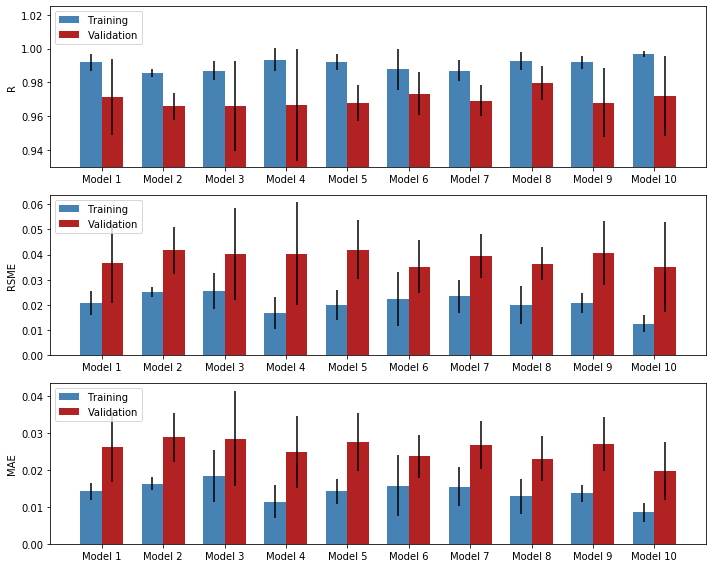

In [5]:
Labels=['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6','Model 7','Model 8','Model 9','Model 10']
x=np.arange(len(Labels))

fig, ax= plt.subplots(3,figsize=(10,8))
width=0.35
train=ax[0].bar(x-width/2,train_log['Train_R2'],width, yerr=train_log['Train_R2 std'],label='Training',color='steelblue')
val=ax[0].bar(x+width/2,train_log['Test_R2'],width, yerr=train_log['Test_R2 std'],label="Validation",color='firebrick')
ax[0].set_xticks(x)
ax[0].set_xticklabels(Labels)
ax[0].set_ylabel('R')
ax[0].legend(loc='upper left')
ax[0].set_ylim([0.93,1.025])

train=ax[1].bar(x-width/2,train_log['Train_RSME'],width, yerr=train_log['Train_RSME std'],label='Training',color='steelblue')
val=ax[1].bar(x+width/2,train_log['Test_RSME'],width, yerr=train_log['Test_RSME std'],label="Validation",color='firebrick')
ax[1].set_xticks(x)
ax[1].set_xticklabels(Labels)
ax[1].set_ylabel('RSME')
ax[1].legend(loc='upper left')

train=ax[2].bar(x-width/2,train_log['Train_MAE'],width, yerr=train_log['Train_MAE std'],label='Training',color='steelblue')
val=ax[2].bar(x+width/2,train_log['Test_MAE'],width, yerr=train_log['Test_MAE std'],label="Validation",color='firebrick')
ax[2].set_xticks(x)
ax[2].set_xticklabels(Labels)
ax[2].set_ylabel('MAE')
ax[2].legend(loc='upper left')

fig.tight_layout()
fig.savefig('Plot\\stat.png',dpi=250)
plt.show()

In [6]:
pred_train1=pd.read_csv('Training\\Trial-666\\pred_train1.csv',skipinitialspace=True)
pred_train2=pd.read_csv('Training\\Trial-666\\pred_train2.csv',skipinitialspace=True)
pred_train3=pd.read_csv('Training\\Trial-666\\pred_train3.csv',skipinitialspace=True)
pred_train4=pd.read_csv('Training\\Trial-666\\pred_train4.csv',skipinitialspace=True)

pred_test1=pd.read_csv('Training\\Trial-666\\pred_test1.csv',skipinitialspace=True)
pred_test2=pd.read_csv('Training\\Trial-666\\pred_test2.csv',skipinitialspace=True)
pred_test3=pd.read_csv('Training\\Trial-666\\pred_test3.csv',skipinitialspace=True)
pred_test4=pd.read_csv('Training\\Trial-666\\pred_test4.csv',skipinitialspace=True)

fig, (ax1,ax2)= plt.subplots(1,2,figsize=(12,5))

ax1.scatter(pred_train1['Residual Stress'],pred_train1['Predict'],color='w',edgecolors='b',marker='o',label='Fold 1') # ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
ax1.scatter(pred_train2['Residual Stress'],pred_train2['Predict'],color='w',edgecolors='b',marker='^',label='Fold 2')
ax1.scatter(pred_train3['Residual Stress'],pred_train3['Predict'],color='w',edgecolors='b',marker='s',label='Fold 3')
ax1.scatter(pred_train4['Residual Stress'],pred_train4['Predict'],color='w',edgecolors='b',marker='p',label='Fold 4')
ax1.set_ylabel('Predicted Residual Stress (MPa)')
ax1.set_xlabel('Experimental Residual Stress (MPa)')
ax1.set_title('Training')
_ = ax1.plot([-2000, 2000], [-2000, 2000],color='k',label='fANN=fExp')
ax1.set_xlim([-2000,2000])
ax1.set_ylim([-2000,2000])
ax1.legend()

ax2.scatter(pred_test1['Residual Stress'],pred_test1['Predict'],color='w',edgecolors='r',marker='o',label='Fold 1') # ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
ax2.scatter(pred_test2['Residual Stress'],pred_test2['Predict'],color='w',edgecolors='r',marker='^',label='Fold 2')
ax2.scatter(pred_test3['Residual Stress'],pred_test3['Predict'],color='w',edgecolors='r',marker='s',label='Fold 3')
ax2.scatter(pred_test4['Residual Stress'],pred_test4['Predict'],color='w',edgecolors='r',marker='p',label='Fold 4')
ax2.set_ylabel('Predicted Residual Stress (MPa)')
ax2.set_xlabel('Experimental Residual Stress (MPa)')
ax2.set_title('Validation')
_ = ax2.plot([-2000, 2000], [-2000, 2000],color='k',label='fANN=fExp')
ax2.set_xlim([-2000,2000])
ax2.set_ylim([-2000,2000])
ax2.legend()

fig.tight_layout()
fig.savefig('Plot\\scat_train.png',dpi=1000)
plt.show()

FileNotFoundError: [Errno 2] File b'Training\\Trial-666\\pred_train1.csv' does not exist: b'Training\\Trial-666\\pred_train1.csv'

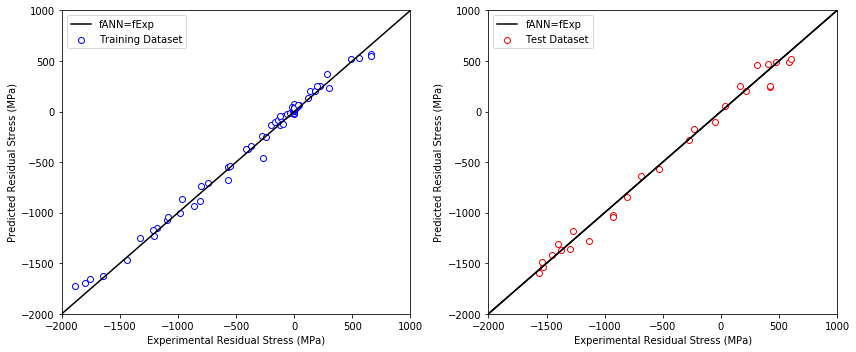

In [9]:
train = pd.read_csv('Final Model\\Trial-8\\train.csv',skipinitialspace=True)
test = pd.read_csv('Final Model\\Trial-8\\test.csv',skipinitialspace=True)

fig, (ax1,ax2)= plt.subplots(1,2,figsize=(12,5))
ax1.scatter(train['Residual Stress'],train['Predict'],color='w',edgecolors='b',marker='o',label='Training Dataset') # ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
ax1.set_ylabel('Predicted Residual Stress (MPa)')
ax1.set_xlabel('Experimental Residual Stress (MPa)')
_ = ax1.plot([-2000, 2000], [-2000, 2000],color='k',label='fANN=fExp')
ax1.set_xlim([-2000,1000])
ax1.set_ylim([-2000,1000])
ax1.legend()

ax2.scatter(test['Residual Stress'],test['Predict'],color='w',edgecolors='r',marker='o',label='Test Dataset') # ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
ax2.set_ylabel('Predicted Residual Stress (MPa)')
ax2.set_xlabel('Experimental Residual Stress (MPa)')
_ = ax2.plot([-2000, 2000], [-2000, 2000],color='k',label='fANN=fExp')
_ = ax2.plot([-2000, 2000], [-2000, 2000],color='k')
ax2.set_xlim([-2000,1000])
ax2.set_ylim([-2000,1000])
ax2.legend()

fig.tight_layout()
fig.savefig('Plot\\scat_val.png',dpi=250)
plt.show()

In [5]:
def norm(x):     
    return (x-min)/(max-min)

max=[1000,20,35,2000,40000,150,100]
max=np.array(max)
min=[0,0,0,0,0,0,0]
min=np.array(min)
#normalization

column_names=['Yield Strengh','UTS','Cr %','Depth','Strikes/mm2','Static Force','Amplitude','Residual Stress']
column_names_r=['Yield Strengh','UTS','Cr %','Depth','Strikes/mm2','Static Force','Amplitude']

#insert parameter 
def set_mat(material):
    
    if material =='718':
        fe=17.62
        hard=400
        cr=18.84
    elif material=='718Plus':
        fe=9.66
        hard=400
        cr=17.42
    elif material=='718Plus_2':
        fe=9.66
        hard=400
        cr=17.42
    elif material=='718Plus_3':
        fe=9.66
        hard=600
        cr=17.42
    elif material=='600':
        fe=9.42
        hard=400
        cr=16.35
    elif material=='690':
        fe=11.6
        hard=200
        cr=29.9
    
    return fe,hard,cr

dir_path='Final Model\\Trial-8\\'
load_path=dir_path+'best_model.h5'
model = keras.models.load_model(load_path)

# plot with area under curve

In [67]:

def full_plot_area(mat):
    fe,hard,cr=set_mat(mat)

    fig, ax=plt.subplots(3,3,figsize=(20,15),constrained_layout=True)

    cpad=-0.01
    levels_RS=np.arange(-2000,1,400)
    cmap_RS='Reds_r'
    levels_d=np.arange(0,1001,200)
    cmap_d='Reds'
    levels_auc=np.arange(0,400001,50000)
    cmap_auc='Reds'
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
   
    #for static load vs amplitude (effective depth)

    st_force=10
    amp=10
    num_strike=8571
    max_depth=1000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr

    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)

    plot_x=[]
    plot_y=[]
    plot_z=[]
    plot_A=[]
    plot_C=[]
    
    for x in range(10):
        x=x+1
        data[:,5]=st_force*x
        for y in range(10):
            y=y+1
            data[:,6]=amp*y
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()*2000

            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions
            
               
            crs=temp['Prediction'][0]
        
            for k in range(1,max_depth+1):
                if temp['Prediction'][k-1]<=0 and temp['Prediction'][k]>0:
                    eff_depth=k-1
            area=0
            
            for k in range(eff_depth):
                area=area+abs(temp['Prediction'][k])

            plot_x.append(st_force*x)
            plot_y.append(amp*y)
            plot_z.append(eff_depth)
            plot_A.append(area)
            plot_C.append(crs)


    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10)).transpose()           
    A=np.array(plot_A).reshape((10,10)).transpose() 
    C=np.array(plot_C).reshape((10,10)).transpose() 
    
    
    ax[0,0].set_xlabel('Static Load (N)')
    ax[0,0].set_ylabel('Amplitude ($\mu$m)')
    im4=ax[0,0].contourf(X[:,0],Y[0,:],C,levels_RS, cmap=cmap_RS,extend='min')
    
    
    ax[1,0].set_xlabel('Static Load (N)')
    ax[1,0].set_ylabel('Amplitude ($\mu$m)')
    im7=ax[1,0].contourf(X[:,0],Y[0,:],Z, levels_d, cmap=cmap_d,extend='max')

    
    
    ax[2,0].set_xlabel('Static Load (N)')
    ax[2,0].set_ylabel('Amplitude ($\mu$m)')
    im10=ax[2,0].contourf(X[:,0],Y[0,:],A, levels_auc, cmap=cmap_auc,extend='max')

  
    
 #----------------------------------------------------------------------------------------------------------------------------------------------------------------   
    #for static load vs Num of strikes (effective depth)

    st_force=10
    amp=30
    num_strike=1000
    max_depth=1000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr

    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    data[:,6]=amp
    plot_x=[]
    plot_y=[]
    plot_z=[]
    plot_A=[]
    plot_C=[]

    for x in range(10):
        x=x+1
        data[:,5]=st_force*x
        for y in range(10):
            y=y+1
            data[:,4]=num_strike*y*4
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()*2000

            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions
                     
            crs=temp['Prediction'][0]
            
            for k in range(1,max_depth+1):
                if temp['Prediction'][k-1]<=0 and temp['Prediction'][k]>0:
                    eff_depth=k-1

                    
            area=0
            
            for k in range(eff_depth):
                area=area+abs(temp['Prediction'][k])
                
            plot_x.append(st_force*x)
            plot_y.append(num_strike*y*4)
            plot_z.append(eff_depth)
            plot_A.append(area)
            plot_C.append(crs)

    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10)).transpose()           
    A=np.array(plot_A).reshape((10,10)).transpose() 
    C=np.array(plot_C).reshape((10,10)).transpose() 
    

    ax[0,1].set_xlabel('Static Load (N)')
    ax[0,1].set_ylabel('Number of Strikes/mm$^2$')
    im5=ax[0,1].contourf(X[:,0],Y[0,:],C,levels_RS, cmap=cmap_RS,extend='min')
    

    ax[1,1].set_xlabel('Static Load (N)')
    ax[1,1].set_ylabel('Number of Strikes/mm$^2$')
    im8=ax[1,1].contourf(X[:,0],Y[0,:],Z, levels_d, cmap=cmap_d,extend='max')


    ax[2,1].set_xlabel('Static Load (N)')
    ax[2,1].set_ylabel('Number of Strikes/mm$^2$')
    im11=ax[2,1].contourf(X[:,0],Y[0,:],A, levels_auc, cmap=cmap_auc,extend='max')

    
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
 #for Amplitude vs Num of strikes (effective depth)

    st_force=50
    amp=10
    num_strike=1000
    max_depth=1000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,5]=st_force
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    
    plot_x=[]
    plot_y=[]
    plot_z=[]
    plot_A=[]
    plot_C=[]

    for x in range(10):
        x=x+1
        data[:,6]=amp*x
        for y in range(10):
            y=y+1
            data[:,4]=num_strike*y*4
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()*2000

            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions
            
            crs=temp['Prediction'][0]        
            
            for k in range(1,max_depth+1):
                if temp['Prediction'][k-1]<=0 and temp['Prediction'][k]>0:
                    eff_depth=k-1

            area=0
            
            for k in range(eff_depth):
                area=area+abs(temp['Prediction'][k])                  
                    
                    
            plot_x.append(amp*x)
            plot_y.append(num_strike*y*4)
            plot_z.append(eff_depth)
            plot_A.append(area)
            plot_C.append(crs)

    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10)).transpose()           
    A=np.array(plot_A).reshape((10,10)).transpose() 
    C=np.array(plot_C).reshape((10,10)).transpose() 

    
    ax[0,2].set_xlabel('Amplitude ($\mu$m)')
    ax[0,2].set_ylabel('Number of Strikes/mm$^2$')
    im6=ax[0,2].contourf(X[:,0],Y[0,:],C,levels_RS, cmap=cmap_RS,extend='min')

    axes=[ax[0,0],ax[0,1],ax[0,2]]
    clb=fig.colorbar(im6, ax=axes,pad=cpad)

    clb.ax.set_title('Residual Stress (MPa)')
    
    
    ax[1,2].set_xlabel('Amplitude ($\mu$m)')
    ax[1,2].set_ylabel('Number of Strikes/mm$^2$')
    im9=ax[1,2].contourf(X[:,0],Y[0,:],Z, levels_d, cmap=cmap_d,extend='max')

    axes=[ax[1,0],ax[1,1],ax[1,2]]
    clb=fig.colorbar(im9, ax=axes,pad=cpad)

    clb.ax.set_title('Effective Depth (um)')

    
    
    ax[2,2].set_xlabel('Amplitude ($\mu$m)')
    ax[2,2].set_ylabel('Number of Strikes/mm$^2$')
    im12=ax[2,2].contourf(X[:,0],Y[0,:],A, levels_auc, cmap=cmap_auc,extend='max')

    axes=[ax[2,0],ax[2,1],ax[2,2]]
    clb=fig.colorbar(im12, ax=axes,pad=cpad)

    clb.ax.set_title('Area under Curve')
    
    
 #----------------------------------------------------------------------------------------------------------------------------------------------------------------   

    title='Alloy '+mat
    fig.suptitle(title,y=1.02,fontsize=20, fontweight='bold')
   # fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig('Plot\\f_area_'+mat+'.png',dpi=250,bbox_inches = "tight")
    plt.show()


# Balancing tensile inclusion

In [6]:

def full_plot_area(mat):
    fe,hard,cr=set_mat(mat)

    fig, ax=plt.subplots(4,3,figsize=(20 ,20),constrained_layout=True)


    levels_RS=np.arange(-2000,1,400)
    cmap_RS='Reds_r'
    levels_d=np.arange(0,1001,200)
    cmap_d='Reds'
    levels_auc=np.arange(0,400001,50000)
    cmap_auc='Reds'
    levels_t=np.arange(0,600,100)
    cmap_t='Reds'
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
   
    #for static load vs amplitude (effective depth)

    st_force=10
    amp=10
    num_strike=8571
    max_depth=2000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr

    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)

    plot_x=[]
    plot_y=[]
    plot_z=[]
    plot_A=[]
    plot_C=[]
    plot_T=[]
    for x in range(10):
        x=x+1
        data[:,5]=st_force*x
        for y in range(10):
            y=y+1
            data[:,6]=amp*y
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()
            
            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions*2500
            
            max_t=np.max(temp['Prediction'])  
            crs=temp['Prediction'][0]
        
            for k in range(1,max_depth+1):
                if temp['Prediction'][k-1]<=-20 and temp['Prediction'][k]>-20:
                    eff_depth=k-1
            area=0
            
            for k in range(eff_depth):
                area=area+abs(temp['Prediction'][k])

            plot_x.append(st_force*x)
            plot_y.append(amp*y)
            plot_z.append(eff_depth)
            plot_A.append(area)
            plot_C.append(crs)
            plot_T.append(max_t)

    

    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10)).transpose()           
    A=np.array(plot_A).reshape((10,10)).transpose() 
    C=np.array(plot_C).reshape((10,10)).transpose() 
    T=np.array(plot_T).reshape((10,10)).transpose()
    
    ax[0,0].set_title('a',loc='left', fontsize=18, fontweight='bold')
    ax[0,0].set_xlabel('Static Load (N)')
    ax[0,0].set_ylabel('Amplitude ($\mu$m)')
    im4=ax[0,0].contourf(X[:,0],Y[0,:],C,levels_RS, cmap=cmap_RS,extend='min')
    
    ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
    ax[1,0].set_xlabel('Static Load (N)')
    ax[1,0].set_ylabel('Amplitude ($\mu$m)')
    im1=ax[1,0].contourf(X[:,0],Y[0,:],T,levels_t, cmap=cmap_t,extend='max')
    
    ax[2,0].set_title('g',loc='left', fontsize=18, fontweight='bold')
    ax[2,0].set_xlabel('Static Load (N)')
    ax[2,0].set_ylabel('Amplitude ($\mu$m)')
    im7=ax[2,0].contourf(X[:,0],Y[0,:],Z, levels_d, cmap=cmap_d,extend='max')

    
    ax[3,0].set_title('j',loc='left', fontsize=18, fontweight='bold')
    ax[3,0].set_xlabel('Static Load (N)')
    ax[3,0].set_ylabel('Amplitude ($\mu$m)')
    im10=ax[3,0].contourf(X[:,0],Y[0,:],A, levels_auc, cmap=cmap_auc,extend='max')

  
    
 #----------------------------------------------------------------------------------------------------------------------------------------------------------------   
    #for static load vs Num of strikes (effective depth)

    st_force=10
    amp=30
    num_strike=1000
    max_depth=2000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr

    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    data[:,6]=amp
    plot_x=[]
    plot_y=[]
    plot_z=[]
    plot_A=[]
    plot_C=[]
    plot_T=[]
    for x in range(10):
        x=x+1
        data[:,5]=st_force*x
        for y in range(10):
            y=y+1
            data[:,4]=num_strike*y*4
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()
            
            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions*2500
                     
            max_t=np.max(temp['Prediction']) 
            crs=temp['Prediction'][0]
            
            for k in range(1,max_depth+1):
                if temp['Prediction'][k-1]<=-20 and temp['Prediction'][k]>-20:
                    eff_depth=k-1

                    
            area=0
            
            for k in range(eff_depth):
                area=area+abs(temp['Prediction'][k])
                
            plot_x.append(st_force*x)
            plot_y.append(num_strike*y*4)
            plot_z.append(eff_depth)
            plot_A.append(area)
            plot_C.append(crs)
            plot_T.append(max_t)
            
    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10)).transpose()           
    A=np.array(plot_A).reshape((10,10)).transpose() 
    C=np.array(plot_C).reshape((10,10)).transpose() 
    
    ax[0,1].set_title('b',loc='left', fontsize=18, fontweight='bold')
    ax[0,1].set_xlabel('Static Load (N)')
    ax[0,1].set_ylabel('Number of Strikes/mm$^2$')
    im5=ax[0,1].contourf(X[:,0],Y[0,:],C,levels_RS, cmap=cmap_RS,extend='min')

    ax[1,1].set_title('e',loc='left', fontsize=18, fontweight='bold')
    ax[1,1].set_xlabel('Static Load (N)')
    ax[1,1].set_ylabel('Number of Strikes/mm$^2$')
    im2=ax[1,1].contourf(X[:,0],Y[0,:],T,levels_t, cmap=cmap_t,extend='max')
    
    ax[2,1].set_title('h',loc='left', fontsize=18, fontweight='bold')
    ax[2,1].set_xlabel('Static Load (N)')
    ax[2,1].set_ylabel('Number of Strikes/mm$^2$')
    im8=ax[2,1].contourf(X[:,0],Y[0,:],Z, levels_d, cmap=cmap_d,extend='max')

    ax[3,1].set_title('k',loc='left', fontsize=18, fontweight='bold')
    ax[3,1].set_xlabel('Static Load (N)')
    ax[3,1].set_ylabel('Number of Strikes/mm$^2$')
    im11=ax[3,1].contourf(X[:,0],Y[0,:],A, levels_auc, cmap=cmap_auc,extend='max')

    
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
 #for Amplitude vs Num of strikes (effective depth)

    st_force=50
    amp=10
    num_strike=1000
    max_depth=2000

    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,5]=st_force
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    
    plot_x=[]
    plot_y=[]
    plot_z=[]
    plot_A=[]
    plot_C=[]
    plot_T=[]
    for x in range(10):
        x=x+1
        data[:,6]=amp*x
        for y in range(10):
            y=y+1
            data[:,4]=num_strike*y*4
            normed=norm(data)
            test_predictions= model.predict(normed).flatten()
           
            temp=pd.DataFrame(data,columns=column_names_r)
            test_predictions= model.predict(normed).flatten()
            temp['Prediction']=test_predictions*2500
            
            max_t=np.max(temp['Prediction']) 
            crs=temp['Prediction'][0]        
            
            for k in range(1,max_depth+1):
                if temp['Prediction'][k-1]<=-20 and temp['Prediction'][k]>-20:
                    eff_depth=k-1

            area=0
            
            for k in range(eff_depth):
                area=area+abs(temp['Prediction'][k])                  
                    
                    
            plot_x.append(amp*x)
            plot_y.append(num_strike*y*4)
            plot_z.append(eff_depth)
            plot_A.append(area)
            plot_C.append(crs)
            plot_T.append(max_t)

    X=np.array(plot_x).reshape((10, 10))
    Y=np.array(plot_y).reshape((10, 10))
    Z=np.array(plot_z).reshape((10, 10)).transpose()           
    A=np.array(plot_A).reshape((10,10)).transpose() 
    C=np.array(plot_C).reshape((10,10)).transpose() 

    ax[0,2].set_title('c',loc='left', fontsize=18, fontweight='bold')
    ax[0,2].set_xlabel('Amplitude ($\mu$m)')
    ax[0,2].set_ylabel('Number of Strikes/mm$^2$')
    im6=ax[0,2].contourf(X[:,0],Y[0,:],C,levels_RS, cmap=cmap_RS,extend='min')

    axes=[ax[0,0],ax[0,1],ax[0,2]]
    clb=fig.colorbar(im6, ax=axes,pad=-0.05)
    
    clb.ax.set_title('Compressive Residual Stress (MPa)')
    
    ax[1,2].set_title('f',loc='left', fontsize=18, fontweight='bold')
    ax[1,2].set_xlabel('Amplitude ($\mu$m)')
    ax[1,2].set_ylabel('Number of Strikes/mm$^2$')    
    im3=ax[1,2].contourf(X[:,0],Y[0,:],T,levels_t, cmap=cmap_t,extend='max')
    axes=[ax[1,0],ax[1,1],ax[1,2]]
    clb=fig.colorbar(im3, ax=axes,pad=-0.04)
    clb.ax.set_title('Tensile Residual Stress (MPa)')
    
    ax[2,2].set_title('i',loc='left', fontsize=18, fontweight='bold')    
    ax[2,2].set_xlabel('Amplitude ($\mu$m)')
    ax[2,2].set_ylabel('Number of Strikes/mm$^2$')
    im9=ax[2,2].contourf(X[:,0],Y[0,:],Z, levels_d, cmap=cmap_d,extend='max')
    axes=[ax[2,0],ax[2,1],ax[2,2]]
    clb=fig.colorbar(im9, ax=axes,pad=-0.025)

    clb.ax.set_title('Effective Depth (um)')

    
    ax[3,2].set_title('l',loc='left', fontsize=18, fontweight='bold')
    ax[3,2].set_xlabel('Amplitude ($\mu$m)')
    ax[3,2].set_ylabel('Number of Strikes/mm$^2$')
    im12=ax[3,2].contourf(X[:,0],Y[0,:],A, levels_auc, cmap=cmap_auc,extend='max')
    axes=[ax[3,0],ax[3,1],ax[3,2]]
    clb=fig.colorbar(im12, ax=axes,pad=-0.025)

    clb.ax.set_title('Area under Curve')
    
    
 #----------------------------------------------------------------------------------------------------------------------------------------------------------------   

    title='Alloy '+mat
    fig.suptitle(title,y=1.02,fontsize=20, fontweight='bold')
   # fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig('Plot\\f_area_'+mat+'.png',dpi=250,bbox_inches = "tight")
    plt.show()


In [6]:
fe,hard,cr=set_mat('718')

#----------------------------------------------------------------------------------------------------------------------------------------------------------------

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    
#for static load vs amplitude (effective depth)

st_force=10
amp=10
num_strike=5000
max_depth=2000

data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z1=[]
plot_A1=[]
plot_C1=[]
plot_T1=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500

        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])
        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-20 and temp['Prediction'][k]>-20:
                eff_depth=k-1
        area=0
        
        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z1.append(eff_depth)
        plot_A1.append(area)
        plot_C1.append(crs)
        plot_T1.append(max_t)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    
#for static load vs amplitude (effective depth)

st_force=10
amp=5
num_strike=10000


data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)


plot_z2=[]
plot_A2=[]
plot_C2=[]
plot_T2=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500

        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])
        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-20 and temp['Prediction'][k]>-20:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z2.append(eff_depth)
        plot_A2.append(area)
        plot_C2.append(crs)
        plot_T2.append(max_t)
        #----------------------------------------------------------------------------------------------------------------------------------------------------------------    
#for static load vs amplitude (effective depth)


num_strike=20000


data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_z3=[]
plot_A3=[]
plot_C3=[]
plot_T3=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500

        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])
        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-20 and temp['Prediction'][k]>-20:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]


        plot_z3.append(eff_depth)
        plot_A3.append(area)
        plot_C3.append(crs)
        plot_T3.append(max_t)
        #----------------------------------------------------------------------------------------------------------------------------------------------------------------    
#for static load vs amplitude (effective depth)

num_strike=30000


data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)


plot_z4=[]
plot_A4=[]
plot_C4=[]
plot_T4=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500

        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])

        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-20 and temp['Prediction'][k]>-20:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]


        plot_z4.append(eff_depth)
        plot_A4.append(area)
        plot_C4.append(crs)
        plot_T4.append(max_t)

 




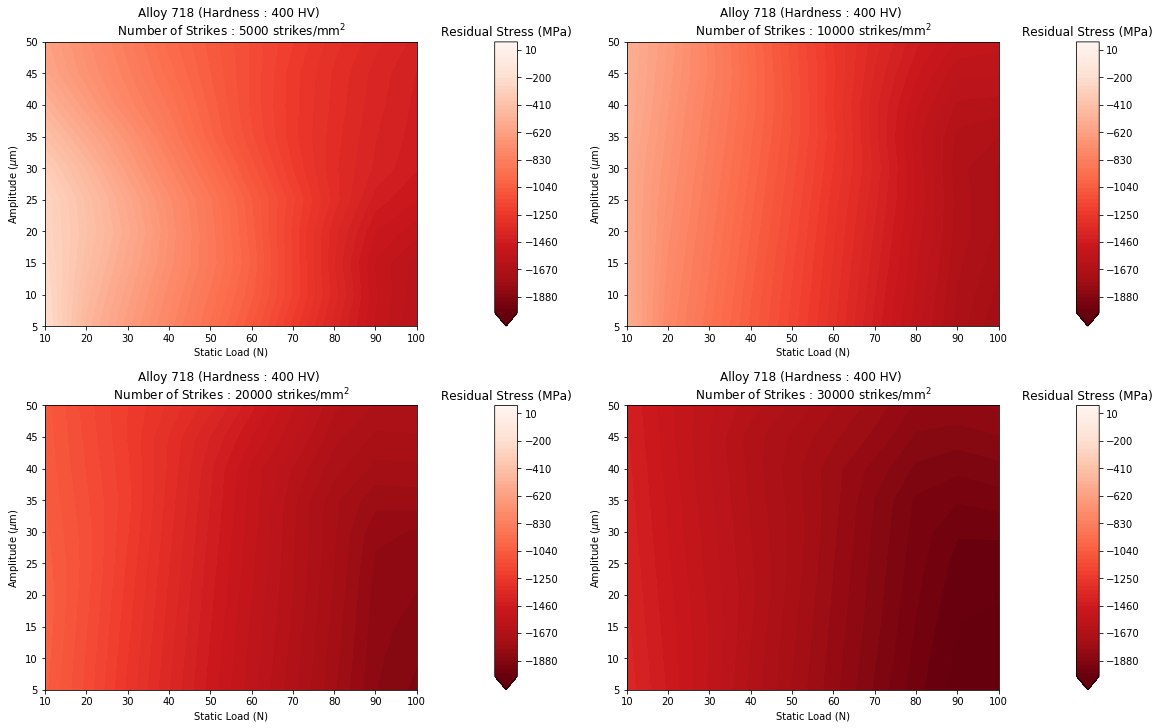

In [7]:
fig, ax=plt.subplots(2,2,figsize=(16,10),constrained_layout=True)

cpad=-0.01
levels_RS=np.arange(-2000,100,30)
cmap_RS='Reds_r'


X=[10,20,30,40,50,60,70,80,90,100]
Y=[5,10,15,20,25,30,35,40,45,50]

         
A=np.array(plot_A1).reshape((10,10)).transpose() 
C=np.array(plot_C1).reshape((10,10)).transpose() 

ax[0,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 5000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,0].set_xlabel('Static Load (N)')
ax[0,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[0,0])
clb.ax.set_title('Residual Stress (MPa)')
# ax[0,0].set_ylim((10,50))
          
A=np.array(plot_A2).reshape((10,10)).transpose() 
C=np.array(plot_C2).reshape((10,10)).transpose() 

ax[0,1].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,1].set_xlabel('Static Load (N)')
ax[0,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[0,1])
clb.ax.set_title('Residual Stress (MPa)')

           
A=np.array(plot_A3).reshape((10,10)).transpose() 
C=np.array(plot_C3).reshape((10,10)).transpose() 

ax[1,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 20000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,0].set_xlabel('Static Load (N)')
ax[1,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[1,0])
clb.ax.set_title('Residual Stress (MPa)')

        
A=np.array(plot_A4).reshape((10,10)).transpose() 
C=np.array(plot_C4).reshape((10,10)).transpose() 

ax[1,1].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 30000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,1].set_xlabel('Static Load (N)')
ax[1,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[1,1])
clb.ax.set_title('Residual Stress (MPa)')


# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\CRS.png',dpi=250,bbox_inches = "tight")
plt.show()

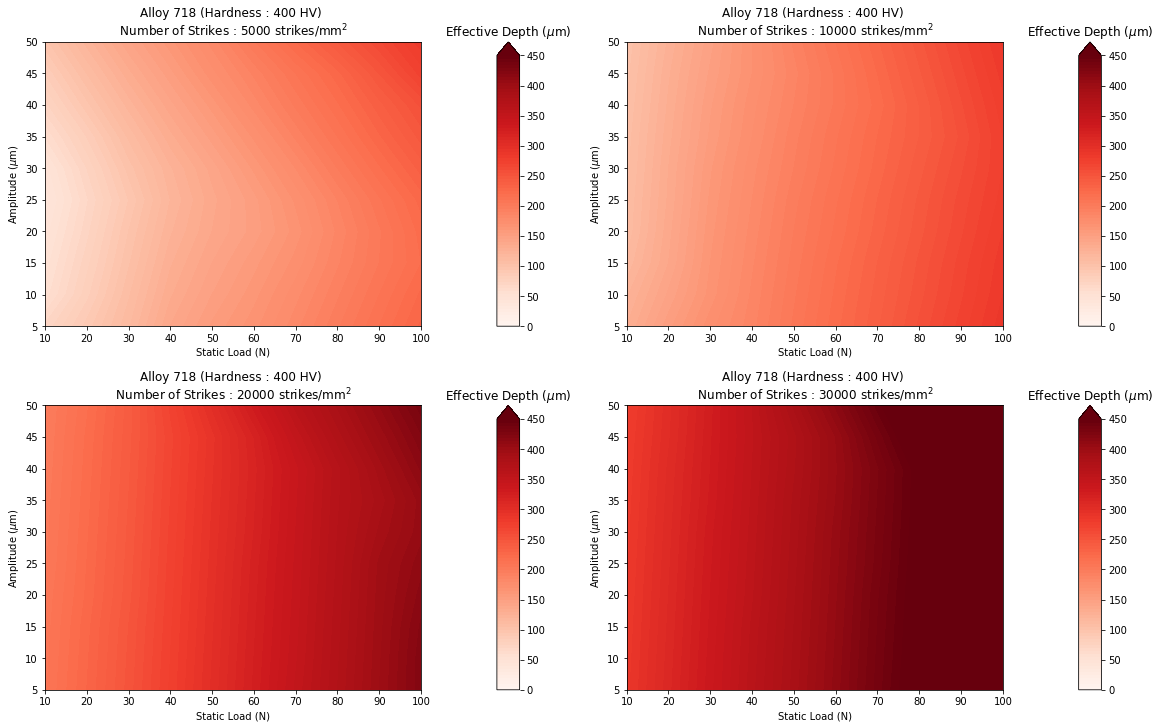

In [8]:
fig, ax=plt.subplots(2,2,figsize=(16,10),constrained_layout=True)

levels_d=np.arange(0,451,5)
cmap_d='Reds'

Z=np.array(plot_z1).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[0,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 5000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,0].set_xlabel('Static Load (N)')
ax[0,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[0,0])
clb.ax.set_title('Effective Depth ($\mu$m)')

Z=np.array(plot_z2).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[0,1].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,1].set_xlabel('Static Load (N)')
ax[0,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[0,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

Z=np.array(plot_z3).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[1,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 20000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,0].set_xlabel('Static Load (N)')
ax[1,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[1,0])
clb.ax.set_title('Effective Depth ($\mu$m)')

Z=np.array(plot_z4).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[1,1].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 30000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,1].set_xlabel('Static Load (N)')
ax[1,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[1,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

fig.savefig('Plot\\D_eff.png',dpi=250,bbox_inches = "tight")
plt.show()

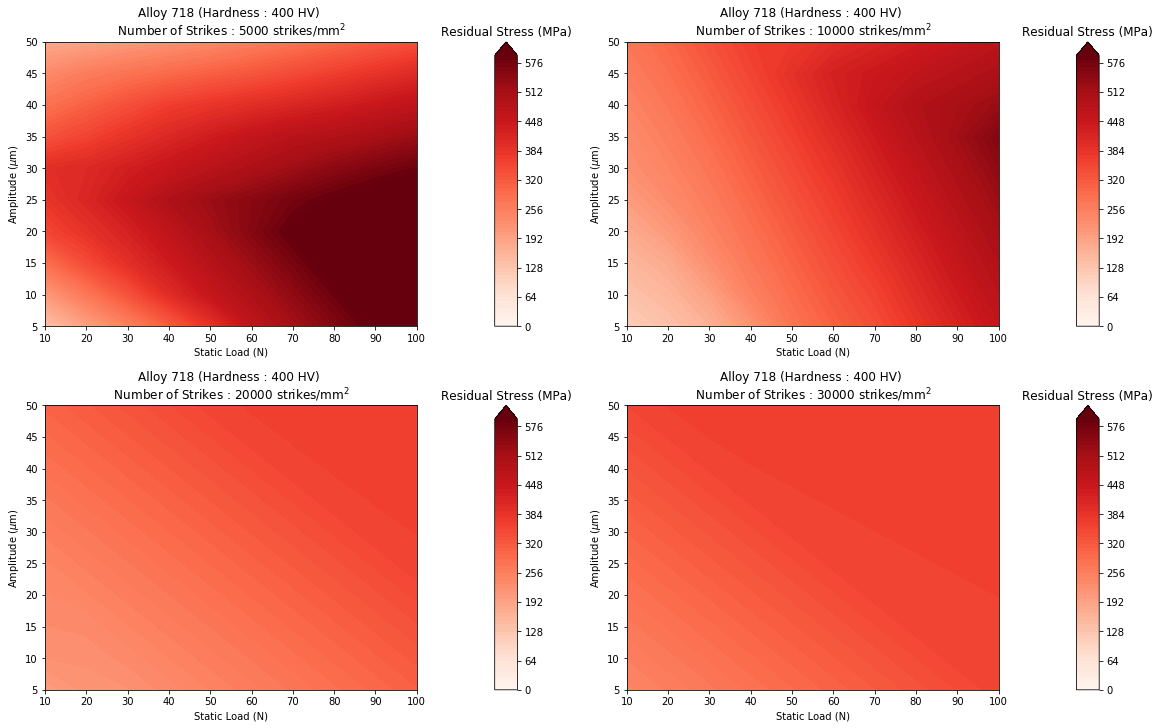

In [9]:
fig, ax=plt.subplots(2,2,figsize=(16,10),constrained_layout=True)

levels_t=np.arange(0,600,8)
cmap_t='Reds'

Z=np.array(plot_T1).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[0,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 5000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,0].set_xlabel('Static Load (N)')
ax[0,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,0].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb=fig.colorbar(im, ax=ax[0,0])
clb.ax.set_title('Residual Stress (MPa)')

Z=np.array(plot_T2).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[0,1].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,1].set_xlabel('Static Load (N)')
ax[0,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,1].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb=fig.colorbar(im, ax=ax[0,1])
clb.ax.set_title('Residual Stress (MPa)')

Z=np.array(plot_T3).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[1,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 20000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,0].set_xlabel('Static Load (N)')
ax[1,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,0].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb=fig.colorbar(im, ax=ax[1,0])
clb.ax.set_title('Residual Stress (MPa)')

Z=np.array(plot_T4).reshape((10, 10)).transpose() # ax[1,0].set_title('d',loc='left', fontsize=18, fontweight='bold')
ax[1,1].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 30000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,1].set_xlabel('Static Load (N)')
ax[1,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,1].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb=fig.colorbar(im, ax=ax[1,1])
clb.ax.set_title('Residual Stress (MPa)')

fig.savefig('Plot\\TRS.png',dpi=250,bbox_inches = "tight")
plt.show()

In [88]:
fe,hard,cr=set_mat('600')

#----------------------------------------------------------------------------------------------------------------------------------------------------------------
h1=400
h2=500
#----------------------------------------------------------------------------------------------------------------------------------------------------------------    
#for static load vs amplitude (effective depth)

st_force=10
amp=5
num_strike=10000
max_depth=2000

hard=h1
data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z1=[]
plot_A1=[]
plot_C1=[]
plot_T1=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500

        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])
        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-75 and temp['Prediction'][k]>-75:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z1.append(eff_depth)
        plot_A1.append(area)
        plot_C1.append(crs)
        plot_T1.append(max_t)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    
hard=h2
data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z2=[]
plot_A2=[]
plot_C2=[]
plot_T2=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500

        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])
        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-75 and temp['Prediction'][k]>-75:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z2.append(eff_depth)
        plot_A2.append(area)
        plot_C2.append(crs)
        plot_T2.append(max_t)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    
fe,hard,cr=set_mat('690')
hard=h1
data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z3=[]
plot_A3=[]
plot_C3=[]
plot_T3=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500
        
        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])
        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-50 and temp['Prediction'][k]>-50:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z3.append(eff_depth)
        plot_A3.append(area)
        plot_C3.append(crs)
        plot_T3.append(max_t)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    


hard=h2
data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z4=[]
plot_A4=[]
plot_C4=[]
plot_T4=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500
        
        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])
        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-50 and temp['Prediction'][k]>-50:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z4.append(eff_depth)
        plot_A4.append(area)
        plot_C4.append(crs)
        plot_T4.append(max_t)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    
fe,hard,cr=set_mat('718')
hard=h1
data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z5=[]
plot_A5=[]
plot_C5=[]
plot_T5=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500

        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])
        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-50 and temp['Prediction'][k]>-50:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z5.append(eff_depth)
        plot_A5.append(area)
        plot_C5.append(crs)
        plot_T5.append(max_t)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    

hard=h2
data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z6=[]
plot_A6=[]
plot_C6=[]
plot_T6=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500

        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])
        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-50 and temp['Prediction'][k]>-50:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z6.append(eff_depth)
        plot_A6.append(area)
        plot_C6.append(crs)
        plot_T6.append(max_t)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    
fe,hard,cr=set_mat('718Plus')
hard=h1
data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z7=[]
plot_A7=[]
plot_C7=[]
plot_T7=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500

        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])
        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-50 and temp['Prediction'][k]>-50:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z7.append(eff_depth)
        plot_A7.append(area)
        plot_C7.append(crs)
        plot_T7.append(max_t)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    


hard=h2
data=np.zeros(((max_depth+1),7))

data[:,0]=hard
data[:,1]=fe
data[:,2]=cr

data[:,4]=num_strike
data[:,3]=np.arange(max_depth+1)

plot_x=[]
plot_y=[]
plot_z8=[]
plot_A8=[]
plot_C8=[]
plot_T8=[]
for x in range(10):
    x=x+1
    data[:,5]=st_force*x
    for y in range(10):
        y=y+1
        data[:,6]=amp*y
        normed=norm(data)
        test_predictions= model.predict(normed).flatten()

        temp=pd.DataFrame(data,columns=column_names_r)
        test_predictions= model.predict(normed).flatten()
        temp['Prediction']=test_predictions*2500

        crs=temp['Prediction'][0]
        max_t=np.max(temp['Prediction'])
        eff_depth=0
        for k in range(1,max_depth+1):
            if temp['Prediction'][k-1]<=-50 and temp['Prediction'][k]>-50:
                eff_depth=k-1
        area=0

        for k in range(eff_depth):
            area=area+temp['Prediction'][k]

        plot_z8.append(eff_depth)
        plot_A8.append(area)
        plot_C8.append(crs)
        plot_T8.append(max_t)

#----------------------------------------------------------------------------------------------------------------------------------------------------------------    


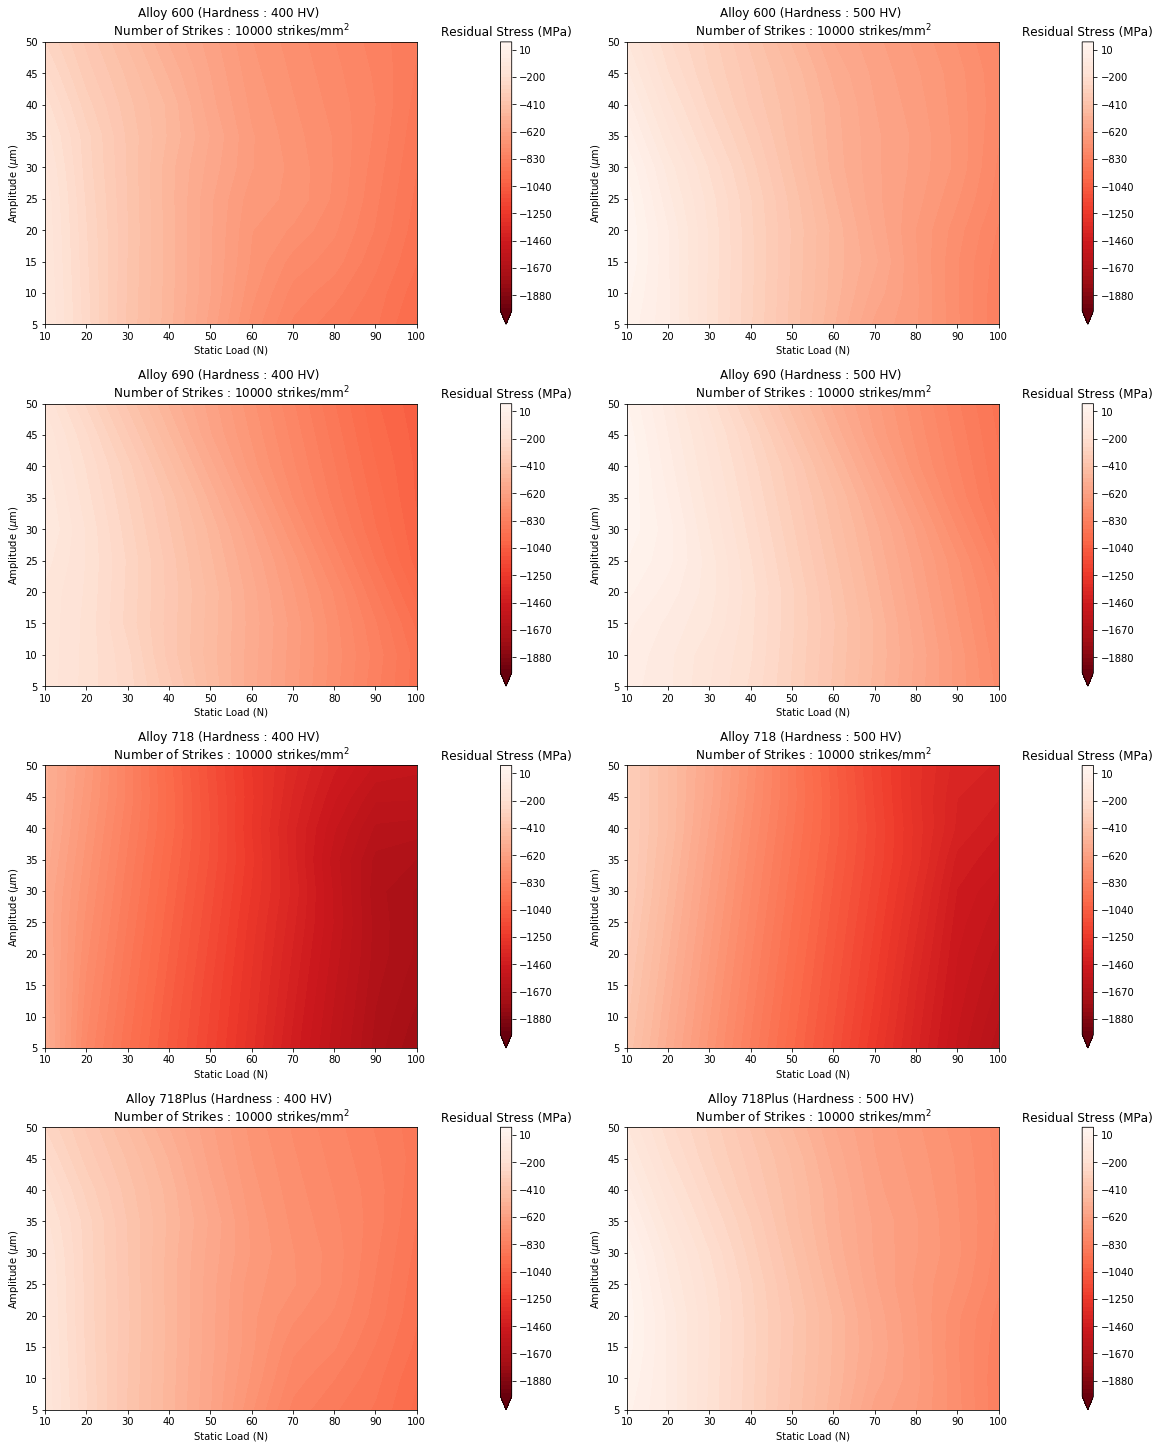

In [99]:
fig, ax=plt.subplots(4,2,figsize=(16,20),constrained_layout=True)

levels_RS=np.arange(-2000,100,30)
cmap_RS='Reds_r'

X=[10,20,30,40,50,60,70,80,90,100]
Y=[5,10,15,20,25,30,35,40,45,50]

         
A=np.array(plot_A1).reshape((10,10)).transpose() 
C=np.array(plot_C1).reshape((10,10)).transpose() 

ax[0,0].set_title('Alloy 600 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,0].set_xlabel('Static Load (N)')
ax[0,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[0,0])
clb.ax.set_title('Residual Stress (MPa)')

          
A=np.array(plot_A2).reshape((10,10)).transpose() 
C=np.array(plot_C2).reshape((10,10)).transpose() 

ax[0,1].set_title('Alloy 600 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,1].set_xlabel('Static Load (N)')
ax[0,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[0,1])
clb.ax.set_title('Residual Stress (MPa)')

           
A=np.array(plot_A3).reshape((10,10)).transpose() 
C=np.array(plot_C3).reshape((10,10)).transpose() 

ax[1,0].set_title('Alloy 690 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,0].set_xlabel('Static Load (N)')
ax[1,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[1,0])
clb.ax.set_title('Residual Stress (MPa)')

        
A=np.array(plot_A4).reshape((10,10)).transpose() 
C=np.array(plot_C4).reshape((10,10)).transpose() 

ax[1,1].set_title('Alloy 690 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,1].set_xlabel('Static Load (N)')
ax[1,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[1,1])
clb.ax.set_title('Residual Stress (MPa)')

A=np.array(plot_A5).reshape((10,10)).transpose() 
C=np.array(plot_C5).reshape((10,10)).transpose() 

ax[2,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,0].set_xlabel('Static Load (N)')
ax[2,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[2,0])
clb.ax.set_title('Residual Stress (MPa)')

          
A=np.array(plot_A6).reshape((10,10)).transpose() 
C=np.array(plot_C6).reshape((10,10)).transpose() 

ax[2,1].set_title('Alloy 718 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,1].set_xlabel('Static Load (N)')
ax[2,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[2,1])
clb.ax.set_title('Residual Stress (MPa)')

           
A=np.array(plot_A7).reshape((10,10)).transpose() 
C=np.array(plot_C7).reshape((10,10)).transpose() 

ax[3,0].set_title('Alloy 718Plus (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,0].set_xlabel('Static Load (N)')
ax[3,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,0].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[3,0])
clb.ax.set_title('Residual Stress (MPa)')

        
A=np.array(plot_A8).reshape((10,10)).transpose() 
C=np.array(plot_C8).reshape((10,10)).transpose() 

ax[3,1].set_title('Alloy 718Plus (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,1].set_xlabel('Static Load (N)')
ax[3,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,1].contourf( X,Y,C,levels_RS, cmap=cmap_RS,extend='min')
clb=fig.colorbar(im, ax=ax[3,1])
clb.ax.set_title('Residual Stress (MPa)')

# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\CRS_2.png',dpi=250,bbox_inches = "tight")


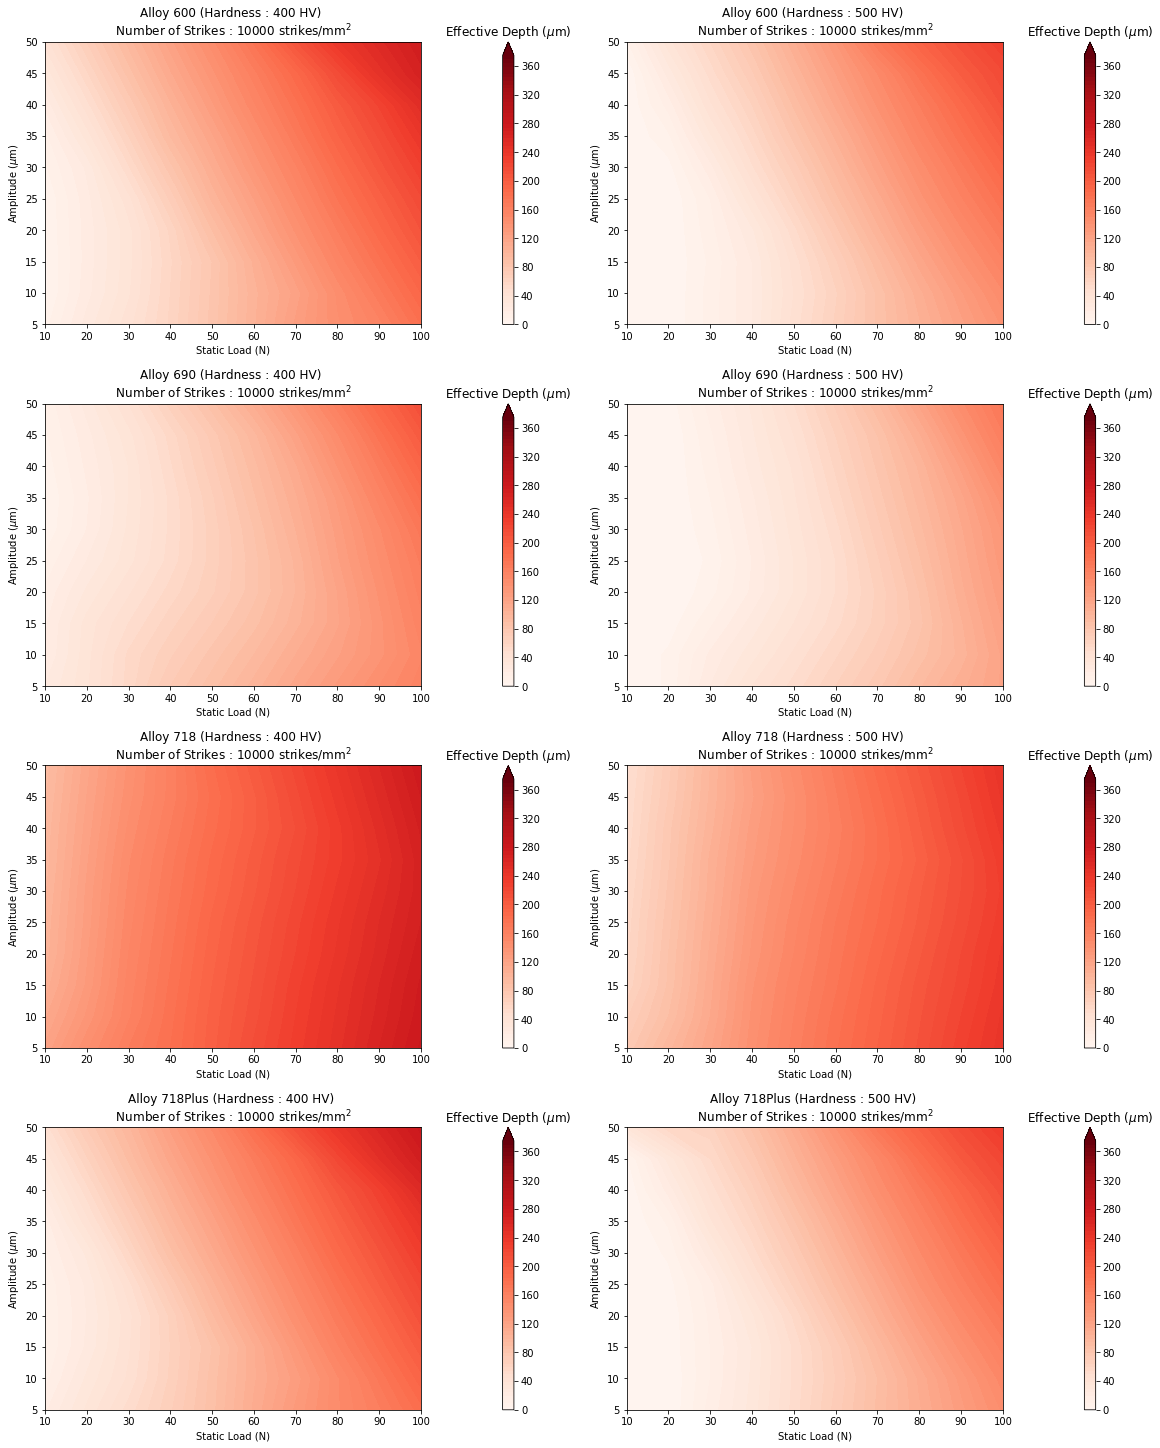

In [100]:
fig, ax=plt.subplots(4,2,figsize=(16,20),constrained_layout=True)

levels_d=np.arange(0,380,5)
cmap_d='Reds'

         
Z=np.array(plot_z1).reshape((10, 10)).transpose()

ax[0,0].set_title('Alloy 600 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,0].set_xlabel('Static Load (N)')
ax[0,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[0,0])
clb.ax.set_title('Effective Depth ($\mu$m)')

          
Z=np.array(plot_z2).reshape((10, 10)).transpose()

ax[0,1].set_title('Alloy 600 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,1].set_xlabel('Static Load (N)')
ax[0,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[0,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

           
Z=np.array(plot_z3).reshape((10, 10)).transpose()

ax[1,0].set_title('Alloy 690 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,0].set_xlabel('Static Load (N)')
ax[1,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[1,0])
clb.ax.set_title('Effective Depth ($\mu$m)')

        
Z=np.array(plot_z4).reshape((10, 10)).transpose()

ax[1,1].set_title('Alloy 690 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,1].set_xlabel('Static Load (N)')
ax[1,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[1,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

Z=np.array(plot_z5).reshape((10, 10)).transpose()

ax[2,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,0].set_xlabel('Static Load (N)')
ax[2,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[2,0])
clb.ax.set_title('Effective Depth ($\mu$m)')
          
Z=np.array(plot_z6).reshape((10, 10)).transpose() 

ax[2,1].set_title('Alloy 718 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,1].set_xlabel('Static Load (N)')
ax[2,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[2,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

           
Z=np.array(plot_z7).reshape((10, 10)).transpose()

ax[3,0].set_title('Alloy 718Plus (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,0].set_xlabel('Static Load (N)')
ax[3,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,0].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[3,0])
clb.ax.set_title('Effective Depth ($\mu$m)')

        
Z=np.array(plot_z8).reshape((10, 10)).transpose() 

ax[3,1].set_title('Alloy 718Plus (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,1].set_xlabel('Static Load (N)')
ax[3,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,1].contourf(X,Y,Z, levels_d, cmap=cmap_d,extend='max')
clb=fig.colorbar(im, ax=ax[3,1])
clb.ax.set_title('Effective Depth ($\mu$m)')

# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\D_eff_2.png',dpi=250,bbox_inches = "tight")


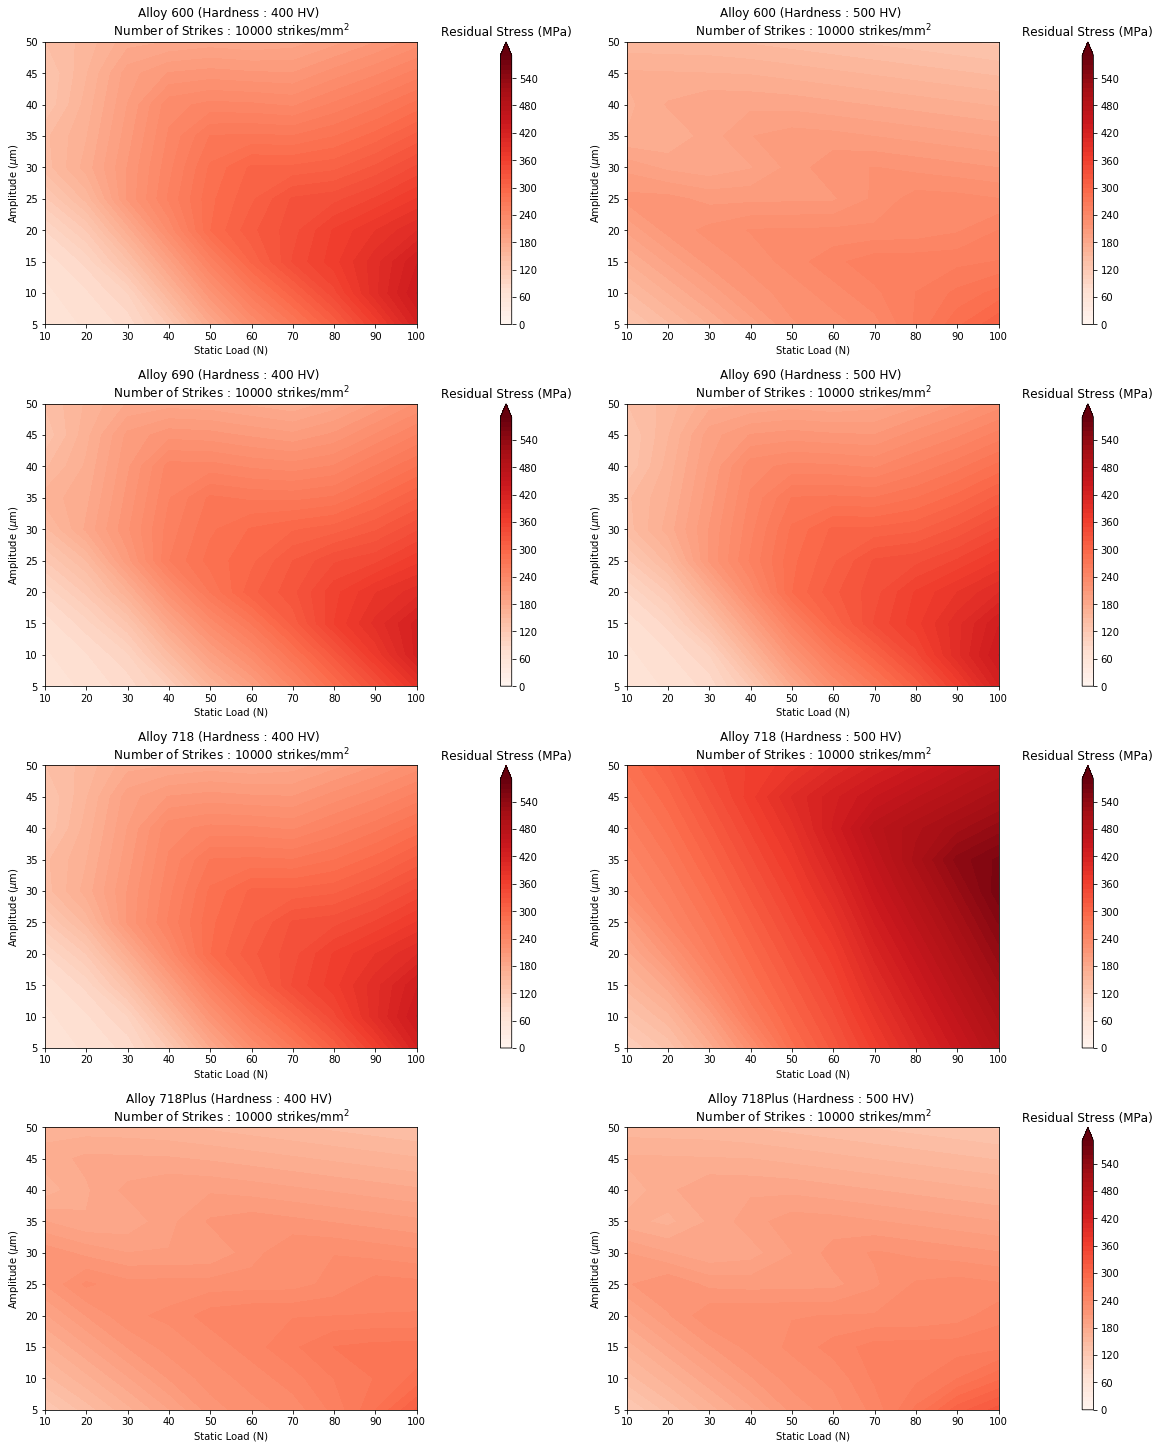

In [91]:
fig, ax=plt.subplots(4,2,figsize=(16,20),constrained_layout=True)

cpad=-0.01

levels_t=np.arange(0,600,10)
cmap_t='Reds'

         
Z=np.array(plot_T4).reshape((10, 10)).transpose()

ax[0,0].set_title('Alloy 600 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,0].set_xlabel('Static Load (N)')
ax[0,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,0].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb=fig.colorbar(im, ax=ax[0,0])
clb.ax.set_title('Residual Stress (MPa)')

Z=np.array(plot_T2).reshape((10, 10)).transpose()

ax[0,1].set_title('Alloy 600 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[0,1].set_xlabel('Static Load (N)')
ax[0,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[0,1].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb=fig.colorbar(im, ax=ax[0,1])
clb.ax.set_title('Residual Stress (MPa)')
           
Z=np.array(plot_T3).reshape((10, 10)).transpose()

ax[1,0].set_title('Alloy 690 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,0].set_xlabel('Static Load (N)')
ax[1,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,0].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb=fig.colorbar(im, ax=ax[1,0])
clb.ax.set_title('Residual Stress (MPa)')

        
Z=np.array(plot_T4).reshape((10, 10)).transpose()

ax[1,1].set_title('Alloy 690 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[1,1].set_xlabel('Static Load (N)')
ax[1,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[1,1].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb=fig.colorbar(im, ax=ax[1,1])
clb.ax.set_title('Residual Stress (MPa)')

Z=np.array(plot_T4).reshape((10, 10)).transpose()

ax[2,0].set_title('Alloy 718 (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,0].set_xlabel('Static Load (N)')
ax[2,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,0].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb=fig.colorbar(im, ax=ax[2,0])
clb.ax.set_title('Residual Stress (MPa)')
          
Z=np.array(plot_T6).reshape((10, 10)).transpose() 

ax[2,1].set_title('Alloy 718 (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[2,1].set_xlabel('Static Load (N)')
ax[2,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[2,1].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb=fig.colorbar(im, ax=ax[2,1])
clb.ax.set_title('Residual Stress (MPa)')

           
Z=np.array(plot_T7).reshape((10, 10)).transpose()

ax[3,0].set_title('Alloy 718Plus (Hardness : 400 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,0].set_xlabel('Static Load (N)')
ax[3,0].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,0].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb.ax.set_title('Residual Stress (MPa)')

        
Z=np.array(plot_T8).reshape((10, 10)).transpose()

ax[3,1].set_title('Alloy 718Plus (Hardness : 500 HV) \n Number of Strikes : 10000 strikes/mm$^2$ ',loc='center', fontsize=12)
ax[3,1].set_xlabel('Static Load (N)')
ax[3,1].set_ylabel('Amplitude ($\mu$m)')
im=ax[3,1].contourf(X,Y,Z, levels_t, cmap=cmap_t,extend='max')
clb=fig.colorbar(im, ax=ax[3,1])
clb.ax.set_title('Residual Stress (MPa)')

# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\TRS_2.png',dpi=250,bbox_inches = "tight")


In [ ]:
K.clear_session()

In [ ]:
plt.clf()

# Plot Residual stress in respect to depth

In [4]:
def norm(x):     
    return (x-min)/(max-min)

#insert parameter 
def set_mat(material):
    
    if material =='718':
        fe=17.62
        hard=250
        cr=18.84
    elif material=='718Plus':
        fe=9.66
        hard=684
        cr=17.42
    elif material=='600':
        fe=9.42
        hard=185
        cr=16.35
    elif material=='600_1':
        fe=9.42
        hard=160
        cr=16.35
    elif material=='690':
        fe=11.6
        hard=200
        cr=29.9
    elif material=='690_1':
        fe=11.6
        hard=190
        cr=29.9
    return fe,hard,cr


max=[1000,20,35,2000,40000,150,100]
max=np.array(max)
min=[0,0,0,0,0,0,0]
min=np.array(min)
#normalization

column_names=['Yield Strengh','UTS','Cr %','Depth','Strikes/mm2','Static Force','Amplitude','Residual Stress']
column_names_r=['Yield Strengh','UTS','Cr %','Depth','Strikes/mm2','Static Force','Amplitude']


dir_path='Final Model\\Trial-8\\'
load_path=dir_path+'best_model.h5'
model = keras.models.load_model(load_path)

def cal(mat,x,y,z):   
    
        #insert parameter 
       
    
    fe,hard,cr =set_mat(mat)

    st_force=x
    amp=y
    num_strike=z
    max_depth=2000


    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,6]=amp
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    data[:,5]=st_force 
        


    normed=norm(data)

    test_predictions= model.predict(normed).flatten()

    res=pd.DataFrame(data,columns=column_names_r)
    res['Predict']=test_predictions*2500
 
    return res

In [5]:
data =pd.read_csv('plot_use_dataset.csv',skipinitialspace=True)
data

,D_600,RS_600,D_718,RS_718,D_690,RS_690,D_718Plus,RS_718Plus,VD_718,VRS_718,VD_718Plus,VRS_718Plus
0,50,-1096.60,0.0,-1882.92,0.0,-965.00,0.0,-1324.00,0,-1562.31,0.0,-1376.12
1,150,-806.04,5.0,-1798.17,25.0,-741.84,0.0,-1209.79,10,-1532.84,10.0,-1403.39
2,250,-570.39,15.0,-1757.66,50.0,-554.02,10.0,-1218.02,20,-1540.24,30.0,-1272.85
3,350,-393.71,20.0,-1647.13,75.0,-412.04,30.0,-1087.47,30,-1451.83,50.0,-928.20
4,450,-273.34,40.0,-1437.12,100.0,-247.14,50.0,-813.32,40,-1300.76,100.0,-528.72
5,550,-199.88,70.0,-1179.23,125.0,-125.53,75.0,-567.89,50,-1138.65,150.0,-275.46
6,650,-163.96,90.0,-983.97,150.0,-121.08,100.0,-270.23,80,-928.67,200.0,-48.30
7,750,-140.11,100.0,-862.42,175.0,-19.85,150.0,-100.52,100,-807.13,250.0,32.64
8,850,-113.57,185.0,-368.82,200.0,119.58,200.0,35.25,130,-685.58,300.0,215.40
9,950,-88.38,265.0,6.84,225.0,134.23,250.0,298.96,200,-232.52,400.0,421.67


# Traning Dataset

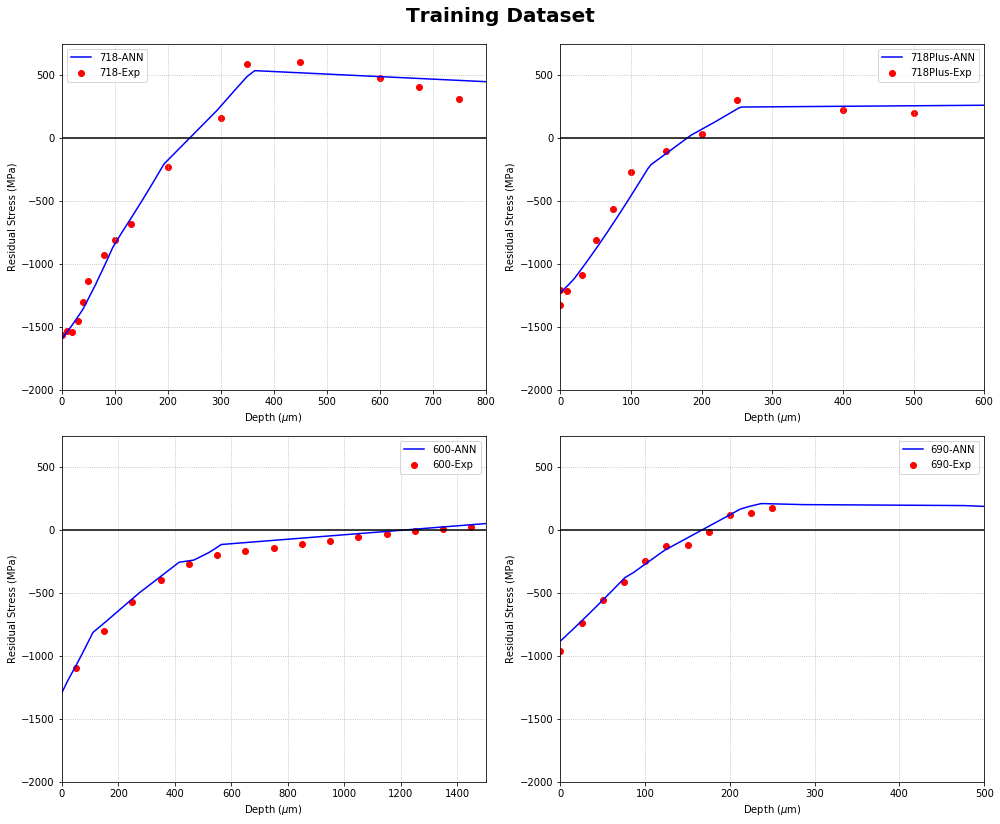

In [6]:
fig, ax = plt.subplots(2,2,figsize=(14,12))

res=cal('718',70,30,5714.3)
ax[0,0].set_xlabel('Depth ($\mu$m)')
ax[0,0].set_ylabel('Residual Stress (MPa)')
ax[0,0].plot(res['Depth'], res['Predict'],label='718-ANN',color='b')  
ax[0,0].scatter(data['VD_718'],data['VRS_718'],label='718-Exp',marker='o',color='r') 
ax[0,0].set_xlim([0,800])
ax[0,0].set_ylim([-2000,750])
ax[0,0].axhline(y=0, color='k')
# set the y-spine
ax[0,0].grid(linestyle=':')
ax[0,0].legend()

res=cal('718Plus',20,8,40000)

ax[0,1].set_xlabel('Depth ($\mu$m)')
ax[0,1].set_ylabel('Residual Stress (MPa)')
ax[0,1].plot(res['Depth'], res['Predict'],label='718Plus-ANN',color='b')  
ax[0,1].scatter(data['D_718Plus'],data['RS_718Plus'],label='718Plus-Exp',marker='o',color='r') 
ax[0,1].set_xlim([0,600])
ax[0,1].set_ylim([-2000,750])
ax[0,1].axhline(y=0, color='k')
# set the y-spine
ax[0,1].grid(linestyle=':')
ax[0,1].legend()

res=cal('600',120,50,20000)

ax[1,0].set_xlabel('Depth ($\mu$m)')
ax[1,0].set_ylabel('Residual Stress (MPa)')
ax[1,0].plot(res['Depth'], res['Predict'],label='600-ANN',color='b')  
ax[1,0].scatter(data['D_600'],data['RS_600'],label='600-Exp',marker='o',color='r') 
ax[1,0].set_xlim([0,1500])
ax[1,0].set_ylim([-2000,750])
ax[1,0].axhline(y=0, color='k')
# set the y-spine
ax[1,0].grid(linestyle=':')
ax[1,0].legend()

res=cal('690',50,50,8571.4)

ax[1,1].set_xlabel('Depth ($\mu$m)')
ax[1,1].set_ylabel('Residual Stress (MPa)')
ax[1,1].plot(res['Depth'], res['Predict'],label='690-ANN',color='b')  
ax[1,1].scatter(data['D_690'],data['RS_690'],label='690-Exp',marker='o',color='r') 
ax[1,1].set_xlim([0,500])
ax[1,1].set_ylim([-2000,750])
ax[1,1].axhline(y=0, color='k')
# set the y-spine
ax[1,1].grid(linestyle=':')
ax[1,1].legend()

fig.suptitle('Training Dataset',y=0.98,fontsize=20, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\splot_train.png',dpi=250)
plt.show()



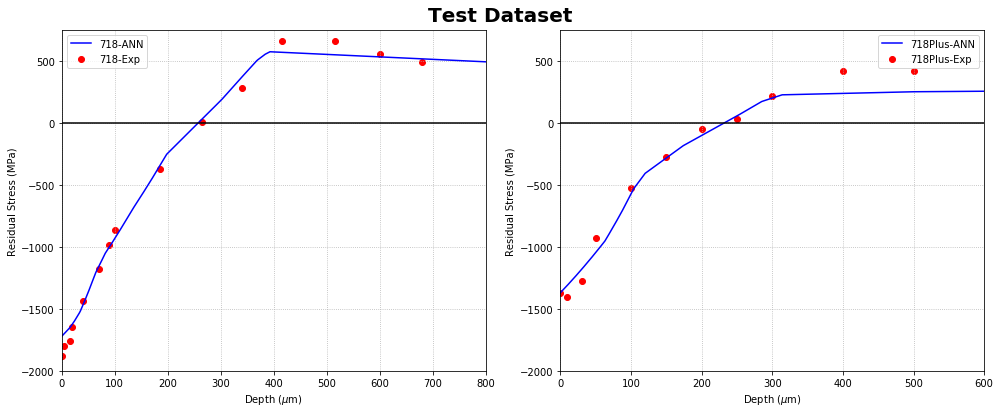

In [7]:

fig, ax = plt.subplots(1,2,figsize=(14,6))

res=cal('718',80,30,5714.3)
ax[0].set_xlabel('Depth ($\mu$m)')
ax[0].set_ylabel('Residual Stress (MPa)')
ax[0].plot(res['Depth'], res['Predict'],label='718-ANN',color='b')  
ax[0].scatter(data['D_718'],data['RS_718'],label='718-Exp',marker='o',color='r') 
ax[0].set_xlim([0,800])
ax[0].set_ylim([-2000,750])
ax[0].axhline(y=0, color='k')
# set the y-spine
ax[0].grid(linestyle=':')
ax[0].legend()

res=cal('718Plus',40,16,40000)

ax[1].set_xlabel('Depth ($\mu$m)')
ax[1].set_ylabel('Residual Stress (MPa)')
ax[1].plot(res['Depth'], res['Predict'],label='718Plus-ANN',color='b')  
ax[1].scatter(data['VD_718Plus'],data['VRS_718Plus'],label='718Plus-Exp',marker='o',color='r') 
ax[1].set_xlim([0,600])
ax[1].set_ylim([-2000,750])
ax[1].axhline(y=0, color='k')
# set the y-spine
ax[1].grid(linestyle=':')
ax[1].legend()


fig.suptitle('Test Dataset',y=0.98,fontsize=20, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('Plot\\splot_test.png',dpi=250)
plt.show()



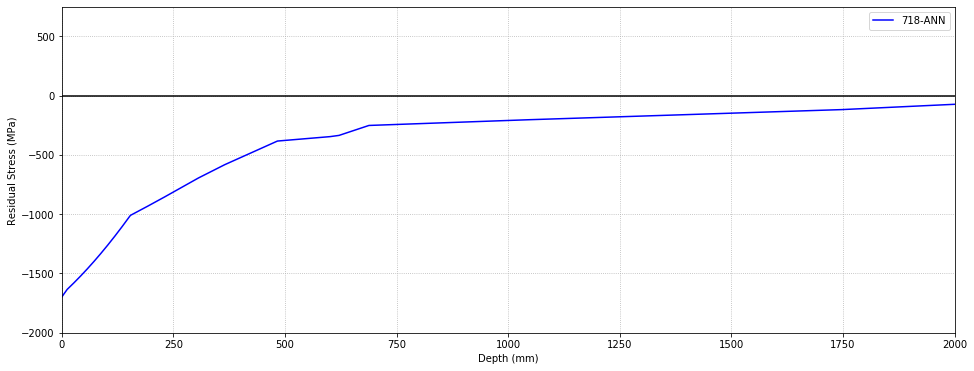

In [77]:
fig, ax = plt.subplots(figsize=(16,6))

res=cal('690',100,100,40000)
ax.set_xlabel('Depth (mm)')
ax.set_ylabel('Residual Stress (MPa)')
ax.plot(res['Depth'], res['Predict'],label='718-ANN',color='b')  
# ax[0].scatter(data['VD_718'],data['VRS_718'],label='718-Exp',marker='s',color='r') 
ax.set_xlim([0,2000])
ax.set_ylim([-2000,750])
ax.axhline(y=0, color='k')
# set the y-spine
ax.grid(linestyle=':')
ax.legend()

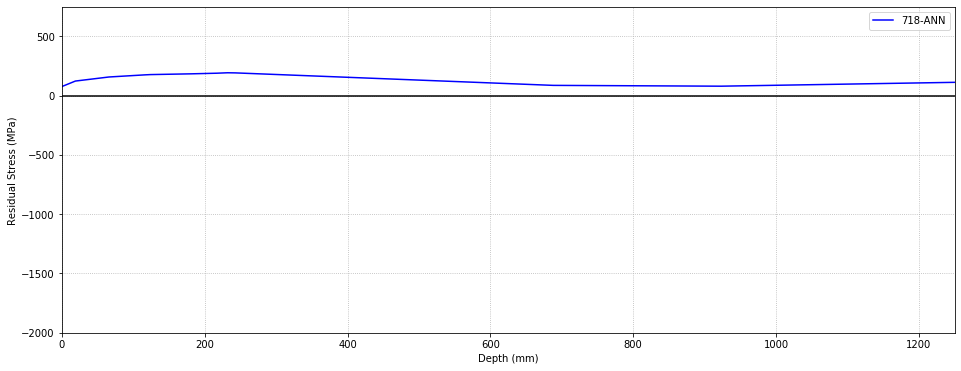

In [78]:
fig, ax = plt.subplots(figsize=(16,6))

res=cal('718Plus',30,30,5000)
ax.set_xlabel('Depth (mm)')
ax.set_ylabel('Residual Stress (MPa)')
ax.plot(res['Depth'], res['Predict'],label='718-ANN',color='b')  
# ax[0].scatter(data['VD_718'],data['VRS_718'],label='718-Exp',marker='s',color='r') 
ax.set_xlim([0,1250])
ax.set_ylim([-2000,750])
ax.axhline(y=0, color='k')
# set the y-spine
ax.grid(linestyle=':')
ax.legend()

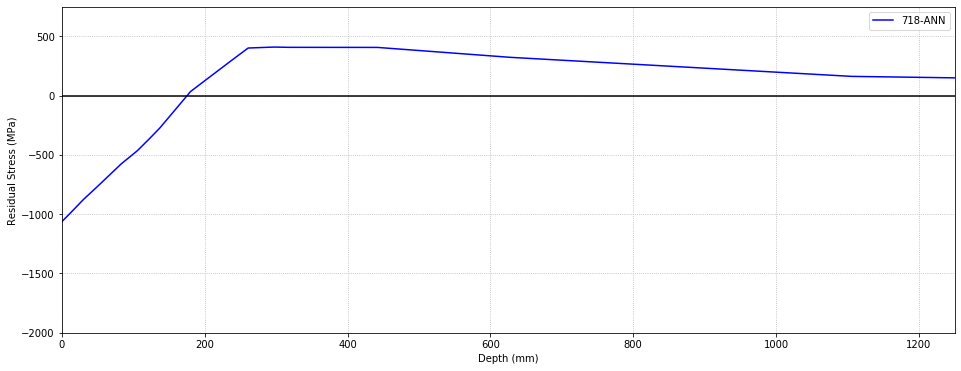

In [79]:
fig, ax = plt.subplots(figsize=(16,6))

res=cal('718',50,10,1000)
ax.set_xlabel('Depth (mm)')
ax.set_ylabel('Residual Stress (MPa)')
ax.plot(res['Depth'], res['Predict'],label='718-ANN',color='b')  
# ax[0].scatter(data['VD_718'],data['VRS_718'],label='718-Exp',marker='s',color='r') 
ax.set_xlim([0,1250])
ax.set_ylim([-2000,750])
ax.axhline(y=0, color='k')
# set the y-spine
ax.grid(linestyle=':')
ax.legend()

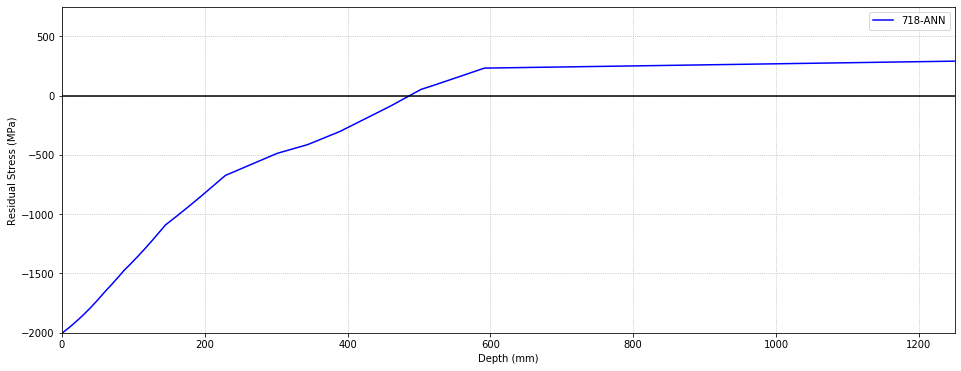

In [80]:
fig, ax = plt.subplots(figsize=(16,6))

res=cal('718',100,10,20000)
ax.set_xlabel('Depth (mm)')
ax.set_ylabel('Residual Stress (MPa)')
ax.plot(res['Depth'], res['Predict'],label='718-ANN',color='b')  
# ax[0].scatter(data['VD_718'],data['VRS_718'],label='718-Exp',marker='s',color='r') 
ax.set_xlim([0,1250])
ax.set_ylim([-2000,750])
ax.axhline(y=0, color='k')
# set the y-spine
ax.grid(linestyle=':')
ax.legend()

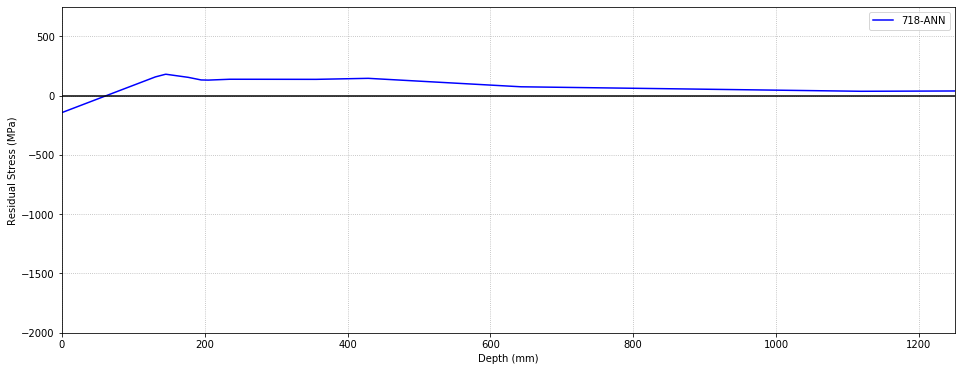

In [81]:
fig, ax = plt.subplots(figsize=(16,6))

res=cal('718',10,10,1000)
ax.set_xlabel('Depth (mm)')
ax.set_ylabel('Residual Stress (MPa)')
ax.plot(res['Depth'], res['Predict'],label='718-ANN',color='b')  
# ax[0].scatter(data['VD_718'],data['VRS_718'],label='718-Exp',marker='s',color='r') 
ax.set_xlim([0,1250])
ax.set_ylim([-2000,750])
ax.axhline(y=0, color='k')
# set the y-spine
ax.grid(linestyle=':')
ax.legend()

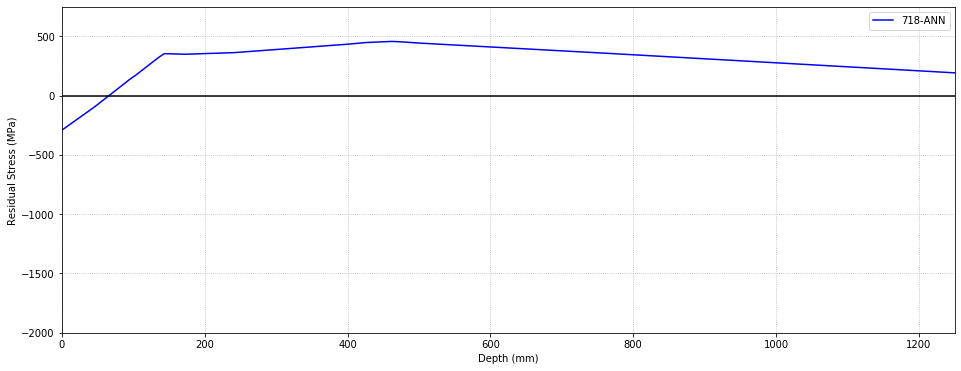

In [82]:
fig, ax = plt.subplots(figsize=(16,6))

res=cal('718',10,50,1000)
ax.set_xlabel('Depth (mm)')
ax.set_ylabel('Residual Stress (MPa)')
ax.plot(res['Depth'], res['Predict'],label='718-ANN',color='b')  
# ax[0].scatter(data['VD_718'],data['VRS_718'],label='718-Exp',marker='s',color='r') 
ax.set_xlim([0,1250])
ax.set_ylim([-2000,750])
ax.axhline(y=0, color='k')
# set the y-spine
ax.grid(linestyle=':')
ax.legend()

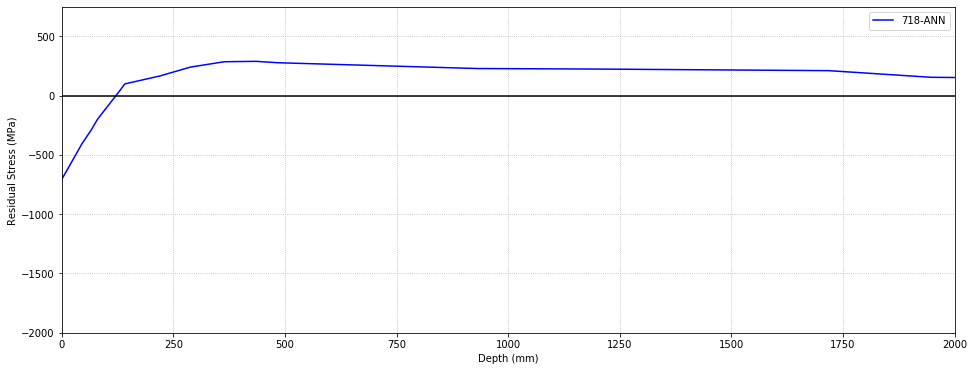

In [83]:
fig, ax = plt.subplots(figsize=(16,6))

res=cal('718',10,100,1000)
ax.set_xlabel('Depth (mm)')
ax.set_ylabel('Residual Stress (MPa)')
ax.plot(res['Depth'], res['Predict'],label='718-ANN',color='b')  
# ax[0].scatter(data['VD_718'],data['VRS_718'],label='718-Exp',marker='s',color='r') 
ax.set_xlim([0,2000])
ax.set_ylim([-2000,750])
ax.axhline(y=0, color='k')
# set the y-spine
ax.grid(linestyle=':')
ax.legend()

In [69]:
def norm(x):     
    return (x-min)/(max-min)

#insert parameter 
def set_mat(material):
    
    if material =='718':
        fe=17.62
        hard=400
        cr=18.84
    elif material=='718Plus':
        fe=9.66
        hard=400
        cr=17.42
    elif material=='600':
        fe=9.42
        hard=400
        cr=16.35
    elif material=='600_1':
        fe=9.42
        hard=400
        cr=16.35
    elif material=='690':
        fe=11.6
        hard=400
        cr=29.9
    elif material=='690_1':
        fe=11.6
        hard=400
        cr=29.9
    return fe,hard,cr


max=[1000,20,35,2000,40000,150,100]
max=np.array(max)
min=[0,0,0,0,0,0,0]
min=np.array(min)
#normalization

column_names=['Yield Strengh','UTS','Cr %','Depth','Strikes/mm2','Static Force','Amplitude','Residual Stress']
column_names_r=['Yield Strengh','UTS','Cr %','Depth','Strikes/mm2','Static Force','Amplitude']


dir_path='Final Model\\Trial-8\\'
load_path=dir_path+'best_model.h5'
model = keras.models.load_model(load_path)

def cal(mat,x,y,z):   
    
        #insert parameter 
       
    
    fe,hard,cr =set_mat(mat)

    st_force=x
    amp=y
    num_strike=z
    max_depth=2000


    data=np.zeros(((max_depth+1),7))

    data[:,0]=hard
    data[:,1]=fe
    data[:,2]=cr
    data[:,6]=amp
    data[:,4]=num_strike
    data[:,3]=np.arange(max_depth+1)
    data[:,5]=st_force 
        


    normed=norm(data)

    test_predictions= model.predict(normed).flatten()

    res=pd.DataFrame(data,columns=column_names_r)
    res['Predict']=test_predictions*2500
 
    return res

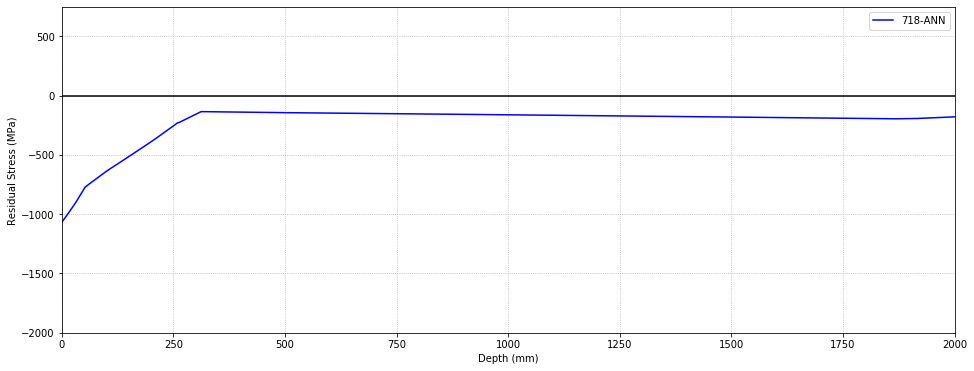

In [76]:
fig, ax = plt.subplots(figsize=(16,6))

res=cal('600',100,100,10000)
ax.set_xlabel('Depth (mm)')
ax.set_ylabel('Residual Stress (MPa)')
ax.plot(res['Depth'], res['Predict'],label='718-ANN',color='b')  
# ax[0].scatter(data['VD_718'],data['VRS_718'],label='718-Exp',marker='s',color='r') 
ax.set_xlim([0,2000])
ax.set_ylim([-2000,750])
ax.axhline(y=0, color='k')
# set the y-spine
ax.grid(linestyle=':')
ax.legend()